# **Mount Google Drive**

---



In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


# **Import Libraries**

---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# **Read Dataset**

---



In [3]:
df=pd.read_excel('/content/drive/MyDrive/unsupervised learning/Mobile Accessories Data per Customer.xlsx')

# **Explore Data**


---




In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  7304 non-null   int64 
 1   item           7304 non-null   object
dtypes: int64(1), object(1)
memory usage: 114.2+ KB


In [5]:
df.head()

,Member_number,item
0,1000,customized mobile cover
1,1000,QT82 Bluetooth Earbuds
2,1000,Samsung Galaxy Mobile Covers
3,1000,WIWU X10 Type-C Cable
4,1001,QT82 Bluetooth Earbuds


In [6]:
df.isnull().sum()

Member_number    0
item             0
dtype: int64

In [7]:
df.duplicated().sum()

0

# **Data Preprocessing**

---



In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
data=df['item'].values
data

array(['customized mobile cover', 'QT82 Bluetooth Earbuds',
       'Samsung Galaxy Mobile Covers', ..., 'WIWU X10 Type-C Cable',
       'customized mobile cover', 'OPPO Mobile Covers'], dtype=object)

In [9]:
vectorizer = TfidfVectorizer(stop_words='english')
X= vectorizer.fit_transform(data)

# **K-mean Clustering**

<ipython-input-10-5530fda9e134>:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  km = km.fit(X)
<ipython-input-10-5530fda9e134>:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  km = km.fit(X)


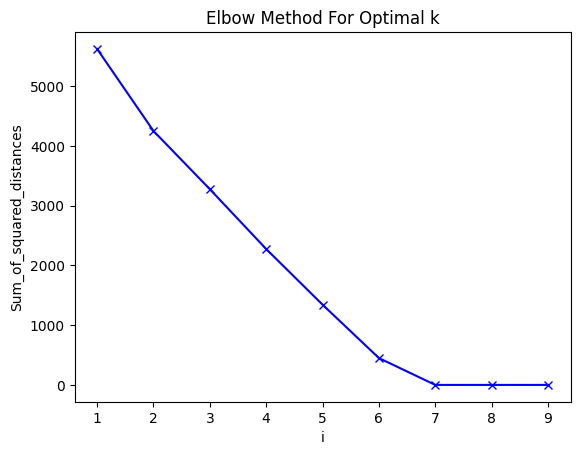

In [10]:
Sum_of_squared_distances = []
k = range(1,10)
for i in k:
       km = KMeans(n_clusters=i, max_iter=200, n_init=10)
       km = km.fit(X)
       Sum_of_squared_distances.append(km.inertia_)
plt.plot(k, Sum_of_squared_distances, 'bx-')
plt.xlabel('i')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
n =5
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

KMeans(max_iter=200, n_clusters=5, n_init=10)

# **Show Results**

In [12]:
labels=model.labels_
clusters=pd.DataFrame(list(zip(data,labels)),columns=['title','cluster'])

for i in range(n):
        print(clusters[clusters['cluster'] == i])

                       title  cluster
1     QT82 Bluetooth Earbuds        0
4     QT82 Bluetooth Earbuds        0
10    QT82 Bluetooth Earbuds        0
27    QT82 Bluetooth Earbuds        0
36    QT82 Bluetooth Earbuds        0
...                      ...      ...
7257  QT82 Bluetooth Earbuds        0
7262  QT82 Bluetooth Earbuds        0
7264  QT82 Bluetooth Earbuds        0
7289  QT82 Bluetooth Earbuds        0
7297  QT82 Bluetooth Earbuds        0

[803 rows x 2 columns]
                             title  cluster
2     Samsung Galaxy Mobile Covers        1
5     Samsung Galaxy Mobile Covers        1
7             RTX Wireless Charger        1
8     Samsung Galaxy Mobile Covers        1
12           RedDio EDX Headphones        1
...                            ...      ...
7288         RedDio EDX Headphones        1
7291  Samsung Galaxy Mobile Covers        1
7294  Samsung Galaxy Mobile Covers        1
7296         RedDio EDX Headphones        1
7299  Samsung Galaxy Mobile Covers  